# Multiple Linear Regression

#### Importing needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

#### Downloading fuel dataset

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


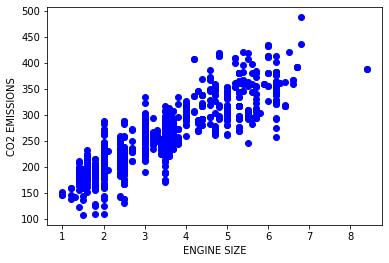

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

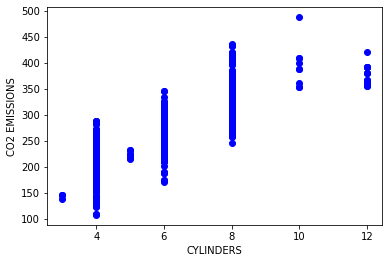

In [5]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSIONS')
plt.show()

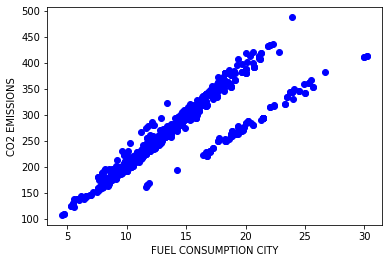

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMPTION CITY')
plt.ylabel('CO2 EMISSIONS')
plt.show()

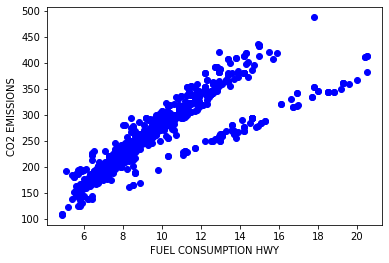

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMPTION HWY')
plt.ylabel('CO2 EMISSIONS')
plt.show()

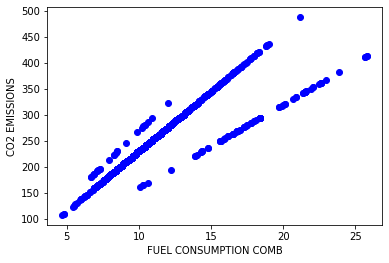

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMPTION COMB')
plt.ylabel('CO2 EMISSIONS')
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

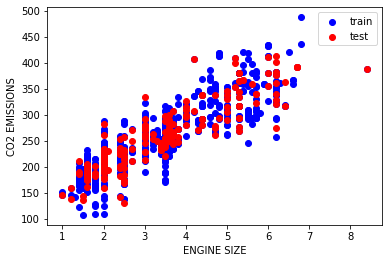

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', label='train')
ax.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red', label='test')
ax.legend(loc='upper right')
ax.set_xlabel('ENGINE SIZE')
ax.set_ylabel('CO2 EMISSIONS')
plt.show()

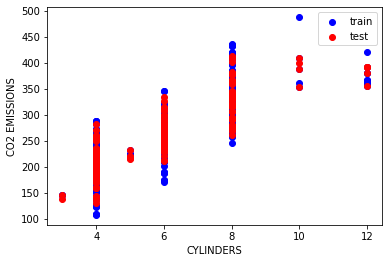

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train.CYLINDERS, train.CO2EMISSIONS, color='blue', label='train')
ax.scatter(test.CYLINDERS, test.CO2EMISSIONS, color='red', label='test')
ax.legend(loc='upper right')
ax.set_xlabel('CYLINDERS')
ax.set_ylabel('CO2 EMISSIONS')
plt.show()

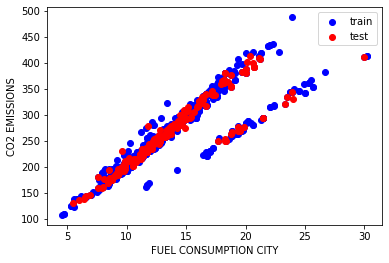

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS, color='blue', label='train')
ax.scatter(test.FUELCONSUMPTION_CITY, test.CO2EMISSIONS, color='red', label='test')
ax.legend(loc='upper right')
ax.set_xlabel('FUEL CONSUMPTION CITY')
ax.set_ylabel('CO2 EMISSIONS')
plt.show()

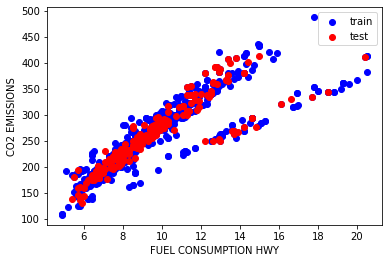

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS, color='blue', label='train')
ax.scatter(test.FUELCONSUMPTION_HWY, test.CO2EMISSIONS, color='red', label='test')
ax.legend(loc='upper right')
ax.set_xlabel('FUEL CONSUMPTION HWY')
ax.set_ylabel('CO2 EMISSIONS')
plt.show()

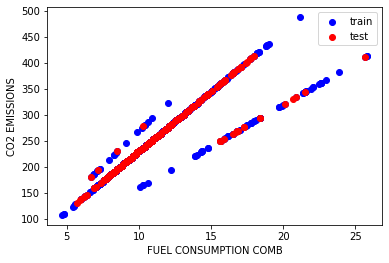

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue', label='train')
ax.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS, color='red', label='test')
ax.legend(loc='upper right')
ax.set_xlabel('FUEL CONSUMPTION COMB')
ax.set_ylabel('CO2 EMISSIONS')
plt.show()

#### Modeling

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[10.90602272  7.32739795  9.67289708]]
Intercept:  [65.12121251]


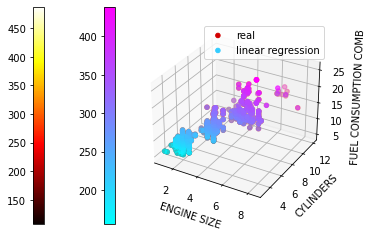

In [16]:
theta_0=regr.intercept_[0]
theta_1=regr.coef_[0][0]
theta_2=regr.coef_[0][1]
theta_3=regr.coef_[0][2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img1 = ax.scatter(train.ENGINESIZE, train.CYLINDERS, train.FUELCONSUMPTION_COMB, c=train.CO2EMISSIONS, cmap=plt.hot(), label='real')
fig.colorbar(img1, location='left')
img2 = ax.scatter(train.ENGINESIZE, train.CYLINDERS, train.FUELCONSUMPTION_COMB, c=theta_0+theta_1*train.ENGINESIZE+theta_2*train.CYLINDERS+theta_3*train.FUELCONSUMPTION_COMB, cmap=plt.cool(), label='linear regression')
fig.colorbar(img2, location='left')
ax.set_xlabel('ENGINE SIZE')
ax.set_ylabel('CYLINDERS')
ax.set_zlabel('FUEL CONSUMPTION COMB')
ax.legend(loc='upper right')
plt.show()

#### Prediction & evaluation

In [19]:
test_x=np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
y_hat=regr.predict(test_x)
print("Mean Square Error: %.2f" % np.mean((test_y - y_hat)**2))
print("variance score: %.2f" % regr.score(test_x, test_y))

Mean Square Error: 515.43
variance score: 0.88


#### Practice

In [23]:
x1=np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y1=np.asanyarray(train[['CO2EMISSIONS']])

regr1=linear_model.LinearRegression()
regr1.fit(x1, y1)

test_x=np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
y_hat=regr1.predict(test_x)
print("Mean Square Error: %.2f" % np.mean((test_y - y_hat)**2))
print("variance score: %.2f" % regr1.score(test_x, test_y))

Mean Square Error: 517.16
variance score: 0.87
